In [1]:
#Import Turing, Distributions, LinearAlgebra and DataFrames
using Turing, Distributions

# Import MCMCChain, Plots, StatsPlots, GraphPlot, GraphRecipes, PyCall and Statistics for visualizations and diagnostics.
using MCMCChains, Plots

# Set a seed for reproducibility.
using Random
Random.seed!(12);

# Turn off progress monitor.
Turing.turnprogress(false)

┌ Info: [Turing]: global PROGRESS is set as false
└ @ Turing /home/saumya/.julia/packages/Turing/RZOZ8/src/Turing.jl:24


false

In [ ]:
N = 500
s = zeros(N)
for i=2:N
    s[i] = s[i - 1]*0.95 + rand(Normal(0, 1))
end

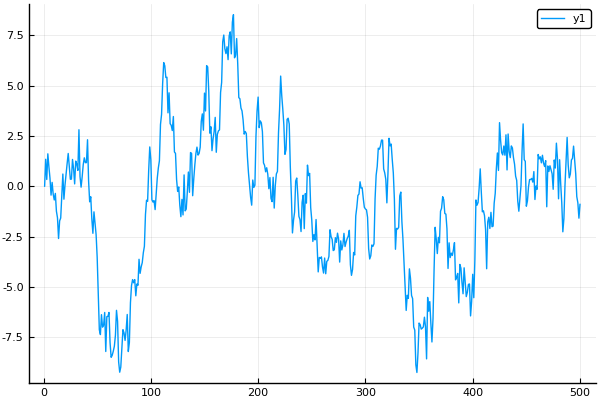

In [23]:
pyplot()
plot(s)

In [ ]:
σ = 1
# Define the model
@model AR1(s, N) = begin
    θ ~ Normal(0, σ)
    
end;